<a href="https://colab.research.google.com/github/vekoada/tensorflow-course/blob/main/03_cnn_worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import zipfile
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
filename = '10_food_classes_all_data.zip'
file = urllib.request.urlretrieve(url, filename)
zip_ref = zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"{len(dirnames)} directories and {len(filenames)} images in {dirpath}")

2 directories and 0 images in 10_food_classes_all_data
10 directories and 0 images in 10_food_classes_all_data/train
0 directories and 750 images in 10_food_classes_all_data/train/pizza
0 directories and 750 images in 10_food_classes_all_data/train/hamburger
0 directories and 750 images in 10_food_classes_all_data/train/sushi
0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
0 directories and 750 images in 10_food_classes_all_data/train/steak
0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
0 directories and 750 images in 10_food_classes_all_data/train/ramen
0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
10 directories and 0 images in 10_food_classes_all_data/test
0 directories and 250 images in 10_food_classes_all_data/test/pizza
0 directories and 250 imag

In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = '10_food_classes_all_data/test'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_randimg(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  randimg = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + randimg[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

Image shape: (340, 512, 3)


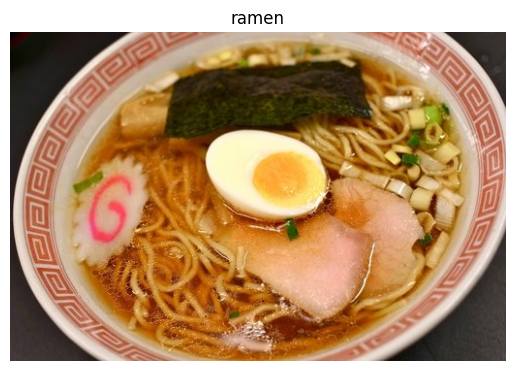

In [ ]:
import random
img = view_randimg(target_dir=train_dir,
                   target_class=random.choice(class_names))

In [ ]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Create our baseline model (replica of Tiny VGG from CNN explainer)
baseline = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
baseline.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [ ]:
history_baseline = baseline.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 132ms/step - loss: 2.1571 - accuracy: 0.2075 - val_loss: 2.0163 - val_accuracy: 0.2732
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.9472 - accuracy: 0.3163 - val_loss: 1.9769 - val_accuracy: 0.3044
Epoch 3/5
235/235 [==============================] - 29s 122ms/step - loss: 1.7507 - accuracy: 0.4031 - val_loss: 1.9288 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 29s 123ms/step - loss: 1.3281 - accuracy: 0.5601 - val_loss: 2.1178 - val_accuracy: 0.3036
Epoch 5/5
235/235 [==============================] - 33s 141ms/step - loss: 0.7269 - accuracy: 0.7623 - val_loss: 2.6668 - val_accuracy: 0.2960


In [ ]:
baseline.evaluate(test_data)

79/79 [==============================] - 8s 101ms/step - loss: 2.6668 - accuracy: 0.2960


[2.6667532920837402, 0.29600000381469727]

In [ ]:
def plot_loss(history):
  """
  Returns separated loss curves for metrics
  """
  loss=history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Loss plot
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  #Accuracy Plot
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

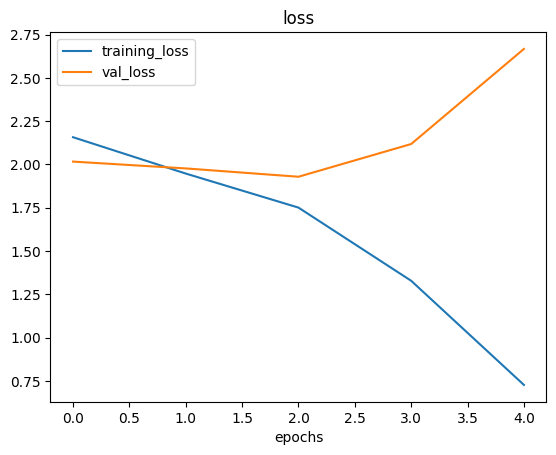

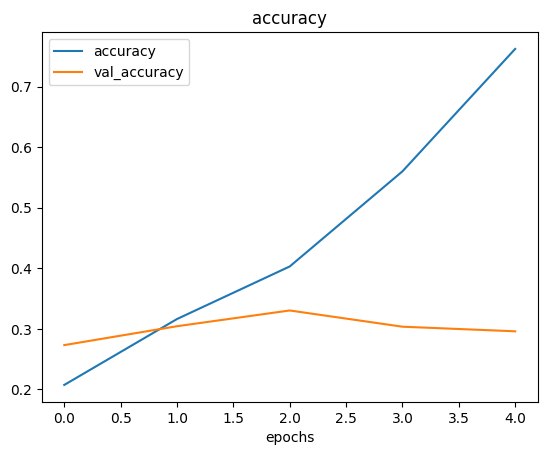

In [ ]:
plot_loss(history_baseline) #Not good. Our model is clearly overfitting

In [ ]:
baseline.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
#Let's simplify the model to try and reduce overfitting. Removing 2 Conv layers
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax') #Sigmoid is for binary classification
])

In [ ]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 120ms/step - loss: 2.1034 - accuracy: 0.2631 - val_loss: 1.8945 - val_accuracy: 0.3284
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.7565 - accuracy: 0.3988 - val_loss: 1.8652 - val_accuracy: 0.3568
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.4096 - accuracy: 0.5344 - val_loss: 1.8925 - val_accuracy: 0.3504
Epoch 4/5
235/235 [==============================] - 27s 116ms/step - loss: 1.0028 - accuracy: 0.6864 - val_loss: 2.1457 - val_accuracy: 0.3356
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.6159 - accuracy: 0.8157 - val_loss: 2.3690 - val_accuracy: 0.3296


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 2.3690 - accuracy: 0.3296


[2.368969440460205, 0.3296000063419342]

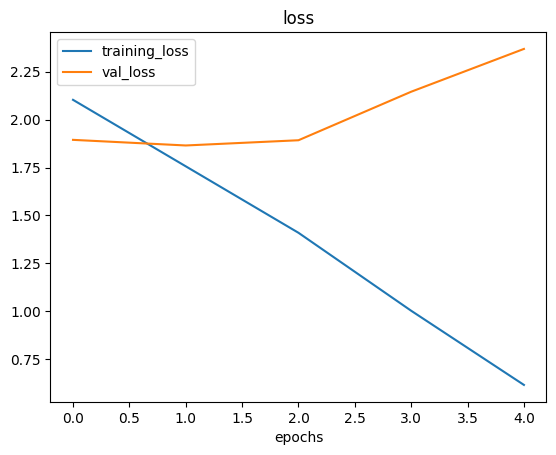

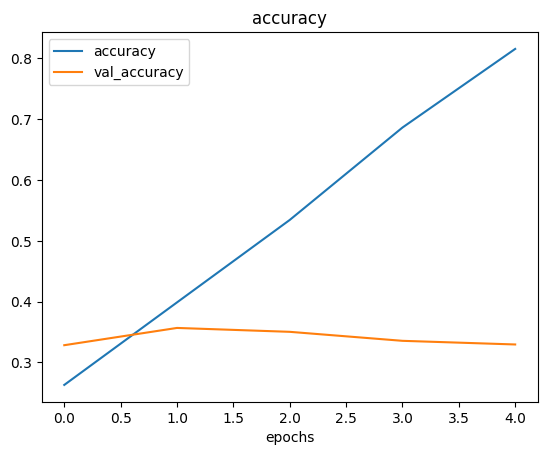

In [ ]:
plot_loss(history_1) #This didn't perform much better...not every experiment improves your results

In [ ]:
#Now we'll augment the data to see if that works
train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_2 = tf.keras.models.clone_model(baseline) #clone only clones architecture, not weights
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 456ms/step - loss: 2.2215 - accuracy: 0.1587 - val_loss: 2.1542 - val_accuracy: 0.2052
Epoch 2/5
235/235 [==============================] - 108s 459ms/step - loss: 2.1055 - accuracy: 0.2448 - val_loss: 1.9583 - val_accuracy: 0.3052
Epoch 3/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0117 - accuracy: 0.2923 - val_loss: 1.8300 - val_accuracy: 0.3728
Epoch 4/5
235/235 [==============================] - 107s 456ms/step - loss: 1.9555 - accuracy: 0.3151 - val_loss: 1.8022 - val_accuracy: 0.3716
Epoch 5/5
235/235 [==============================] - 106s 451ms/step - loss: 1.9093 - accuracy: 0.3365 - val_loss: 1.7620 - val_accuracy: 0.3900


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.7620 - accuracy: 0.3900


[1.7619742155075073, 0.38999998569488525]

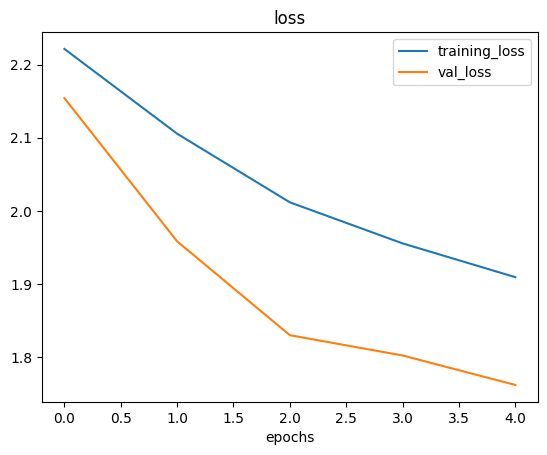

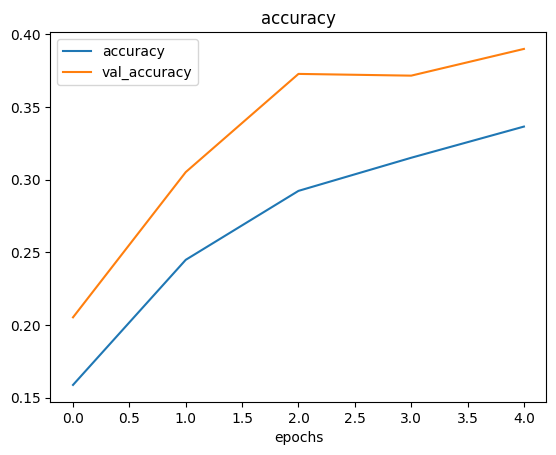

In [ ]:
plot_loss(history_2) #Much better! The validation loss is decreasing alongside the training loss

In [ ]:
!wget -O 01-sushi.jpg https://minimalistbaker.com/wp-content/uploads/2013/10/20-Minute-Sushi-minimalistbaker.com_.jpg
!wget -O 01-steak.jpg https://www.cookingclassy.com/wp-content/uploads/2022/07/grilled-steak-15.jpg
!wget -O 01-icecream.jpg https://thetoastykitchen.com/wp-content/uploads/2021/02/bowl-of-unicorn-ice-cream.jpg

--2023-09-10 23:21:11--  https://minimalistbaker.com/wp-content/uploads/2013/10/20-Minute-Sushi-minimalistbaker.com_.jpg
Resolving minimalistbaker.com (minimalistbaker.com)... 104.22.49.120, 104.22.48.120, 172.67.4.171, ...
Connecting to minimalistbaker.com (minimalistbaker.com)|104.22.49.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239786 (234K) [image/jpeg]
Saving to: ‘01-sushi.jpg’

01-sushi.jpg        100%[===================>] 234.17K  --.-KB/s    in 0.1s    

2023-09-10 23:21:12 (1.59 MB/s) - ‘01-sushi.jpg’ saved [239786/239786]

--2023-09-10 23:21:12--  https://www.cookingclassy.com/wp-content/uploads/2022/07/grilled-steak-15.jpg
Resolving www.cookingclassy.com (www.cookingclassy.com)... 104.26.14.145, 172.67.71.186, 104.26.15.145, ...
Connecting to www.cookingclassy.com (www.cookingclassy.com)|104.26.14.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951985 (930K) [image/jpeg]
Saving to: ‘01-steak.jpg’

01-steak.jpg

In [ ]:
#making a prediction with custom images
def prep_image(filename, image_shape=224):
  """
  Reads an image from filename, turns into tensor and reshapes
  to (image_shape, image_shape, color_channels)
  """
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode into tensor
  img = tf.image.decode_image(img)
  #Resize image
  img = tf.image.resize(img, size=[image_shape, image_shape])
  #Rescale normalize
  img = img/255.
  return img
 #------------------------------------------------------------------
def plot_predict(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes prediction with model,
  plots image with predicted class as title
  """
  #Import the target image and preprocess
  img = prep_image(filename)
  #Prediction
  print(img.shape)
  pred = model.predict(tf.expand_dims(img, axis=0))
  #Get the predicted class
  pred = np.argmax(pred[0])
  pred_class=class_names[int(tf.round(pred))]
  #Plot
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}, {tf.round(pred[0][0]*100)}%")
  plt.axis(False)

# Reminder:
Go back through this notebook and fix prep_image function to correctly display probability


(224, 224, 3)
1/1 [==============================] - 0s 115ms/step


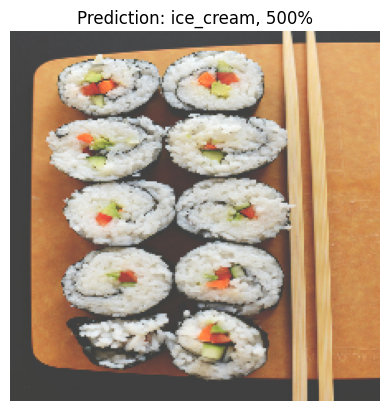

In [ ]:
plot_predict(model=model_2,
             filename='01-sushi.jpg',
             class_names=class_names)

In [ ]:
tf.keras.models.save_model(model_2, 'model_2.h5')

<ipython-input-108-bc316143c049>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_2, 'model_2.h5')
